In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical  
import numpy as np
import matplotlib.pyplot as plt


In [37]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

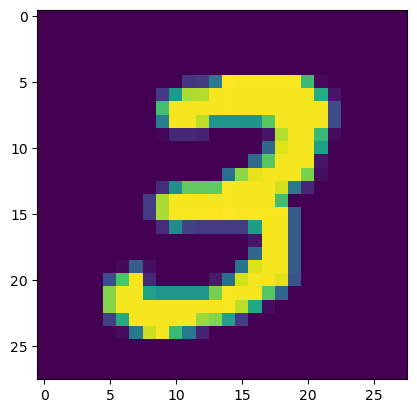

In [75]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
plt.imshow(x_train[7])

In [76]:
y_train[7]

3

In [77]:
x_train[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [78]:
x_train[7].max()

1.0

In [55]:
x_train.max()
x_train = x_train.astype(float) / 255

In [79]:
inputs = keras.Input(shape=(28,28,1))
x = keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu")(inputs)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
x = keras.layers.Dense(32, activation="relu")(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2704)              0         
                                                                 
 dense_26 (Dense)            (None, 64)                173120    
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                           

In [80]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [81]:
history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2378 - accuracy: 0.9282 - val_loss: 0.0977 - val_accuracy: 0.9731
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0806 - val_accuracy: 0.9767
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0632 - val_accuracy: 0.9821
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0626 - val_accuracy: 0.9818
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0567 - val_accuracy: 0.9854
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0679 - val_accuracy: 0.9839
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.0642 - val_accuracy:

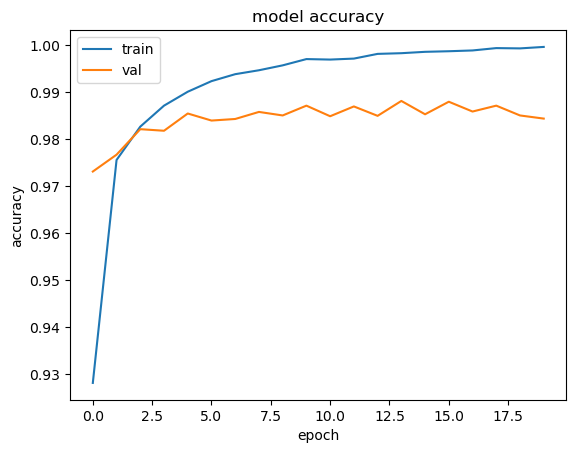

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
model.predict(x_train[7:8])

1/1 [==============================] - 0s 57ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0987679e-36, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.0506153e-29]], dtype=float32)